## Phase 1: Part 4: Clean up of EdFacts data files. This notebook contains code that cleans and preps the edfacts data files for reading and math proficiency scores.

### Clean up the Edfacts file for reading

### Loading necessary libraries

In [41]:
import pandas
pandas.__version__
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
cd /Users/dansa/Documents/GitHub/Phase1/Data/EDFacts

C:\Users\dansa\Documents\GitHub\Phase1\Data\EDFacts


In [43]:
edfacts_eng = pandas.read_csv("rla-achievement-sch-sy2017-18.csv")
edfacts_eng.head()

C:\Users\dansa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (11,13,15,17,19,21,23,25,27,29,31,32,33,35,37,38,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109,111,113,115,117,119,121,123,125,127,129,131,133,135,137,139,141,143,145,147,149,151,153,155,157,159,161,163,165,167,169,171,173,175,177,179,181,183,185,187,189,191,193,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,211,213,215,217,219,221,223,225,227,229,231,233,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STNAM,FIPST,LEAID,ST_LEAID,LEANM,NCESSCH,ST_SCHID,SCHNAM,DATE_CUR,ALL_RLA00NUMVALID_1718,...,MIL_RLA05NUMVALID_1718,MIL_RLA05PCTPROF_1718,MIL_RLA06NUMVALID_1718,MIL_RLA06PCTPROF_1718,MIL_RLA07NUMVALID_1718,MIL_RLA07PCTPROF_1718,MIL_RLA08NUMVALID_1718,MIL_RLA08PCTPROF_1718,MIL_RLAHSNUMVALID_1718,MIL_RLAHSPCTPROF_1718
0,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0010,Albertville Middle School,27-Mar-19,801,...,NaN,NaN,NaN,NaN,11,GE50,14,GE50,NaN,NaN
1,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0020,Albertville High School,27-Mar-19,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,GE50
2,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0110,Evans Elementary School,27-Mar-19,848,...,14,LT50,5,PS,NaN,NaN,NaN,NaN,NaN,NaN
3,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0200,Albertville Elementary School,27-Mar-19,899,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALABAMA,1,100006,AL-048,Marshall County,1.000060e+10,AL-048-0143,Kate Duncan Smith DAR Middle,27-Mar-19,433,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
#selecting only relevant columns
edfacts_eng= edfacts_eng[['STNAM','FIPST','LEAID','ST_LEAID','LEANM','NCESSCH','ST_SCHID','SCHNAM','DATE_CUR','ALL_RLA00NUMVALID_1718',
                                 'ALL_RLA00PCTPROF_1718']]
edfacts_eng.head()

,STNAM,FIPST,LEAID,ST_LEAID,LEANM,NCESSCH,ST_SCHID,SCHNAM,DATE_CUR,ALL_RLA00NUMVALID_1718,ALL_RLA00PCTPROF_1718
0,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0010,Albertville Middle School,27-Mar-19,801,43
1,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0020,Albertville High School,27-Mar-19,337,32
2,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0110,Evans Elementary School,27-Mar-19,848,34
3,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0200,Albertville Elementary School,27-Mar-19,899,41
4,ALABAMA,1,100006,AL-048,Marshall County,1.000060e+10,AL-048-0143,Kate Duncan Smith DAR Middle,27-Mar-19,433,52


In [45]:
edfacts_eng.shape

(88179, 11)

In [46]:
edfacts_eng.rename(columns={'NCESSCH':'NCESSCH_old'}, inplace=True)

In [47]:
edfacts_eng.dtypes

STNAM                      object
FIPST                       int64
LEAID                       int64
ST_LEAID                   object
LEANM                      object
NCESSCH_old               float64
ST_SCHID                   object
SCHNAM                     object
DATE_CUR                   object
ALL_RLA00NUMVALID_1718      int64
ALL_RLA00PCTPROF_1718      object
dtype: object

In [48]:
edfacts_eng.describe()

,FIPST,LEAID,NCESSCH_old,ALL_RLA00NUMVALID_1718
count,88179.000000,8.817900e+04,8.817900e+04,88179.000000
mean,28.673494,2.879054e+06,2.879054e+11,291.949206
std,16.866172,1.686131e+06,1.686131e+11,255.684935
min,1.000000,1.000050e+05,1.000050e+10,1.000000
25%,13.000000,1.301020e+06,1.301020e+11,125.000000
50%,29.000000,2.911010e+06,2.911010e+11,230.000000
75%,42.000000,4.218990e+06,4.218990e+11,372.000000
max,72.000000,7.200030e+06,7.200030e+11,6918.000000


#### Checking for missing or null values

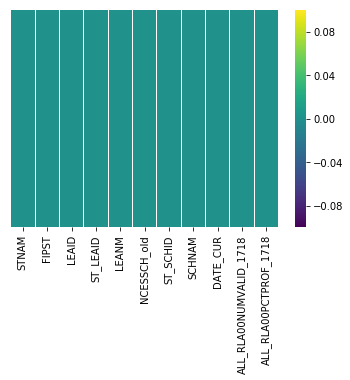

In [49]:
sns.heatmap(edfacts_eng.isnull(),yticklabels=False,cbar=True,cmap='viridis')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028995BBABE0>,
      dtype=object)

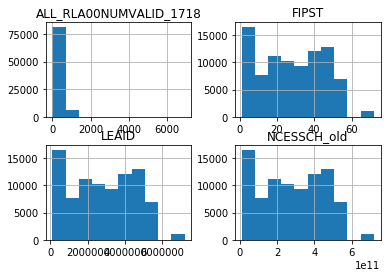

In [50]:
edfacts_eng.hist()

#### Joining ccd_directory and edfacts datasets.
##### The NCESSCH ID was not populated correctly in the raw edfacts data files. Some of the IDs are in Exponential formats and even are attempting to convert them to long strings the ID are not populating correctly. So instead, I will perform an inner join using the ST_SCHID and the ccd_directory file that contains the both the ST_SCHID and NCESSCH ID so that we can later merge all the files using just the NCESSCH id

In [51]:
cd /Users/dansa/Documents/GitHub/Phase1/Data/CCD

C:\Users\dansa\Documents\GitHub\Phase1\Data\CCD


In [52]:
ccd_directory= pandas.read_csv("Clean_ccd_directory.csv")
ccd_directory.head()

,SCHOOL_YEAR,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,ST_LEAID,LEAID,ST_SCHID,NCESSCH,SCHID,SY_STATUS,SCH_TYPE_TEXT,SCH_TYPE,LEVEL
0,2017-2018,AL,Albertville Middle School,Albertville City,1,AL-101,100005,AL-101-0010,10000500870,100870,1,Regular School,1,Middle
1,2017-2018,AL,Albertville High School,Albertville City,1,AL-101,100005,AL-101-0020,10000500871,100871,1,Regular School,1,High
2,2017-2018,AL,Evans Elementary School,Albertville City,1,AL-101,100005,AL-101-0110,10000500879,100879,1,Regular School,1,Middle
3,2017-2018,AL,Albertville Elementary School,Albertville City,1,AL-101,100005,AL-101-0200,10000500889,100889,1,Regular School,1,Elementary
4,2017-2018,AL,Big Spring Lake Kindergarten School,Albertville City,1,AL-101,100005,AL-101-0035,10000501616,101616,1,Regular School,1,Elementary


In [53]:
edfacts_eng_merged_ccd = edfacts_eng.merge(ccd_directory, on='ST_SCHID')

#### Verifying that the merge was successful and that the correct school ID are reflect for each school. Lets look at the school names to confirm this

In [54]:
edfacts_eng_merged_ccd.head().T

,0,1,2,3,4
STNAM,ALABAMA,ALABAMA,ALABAMA,ALABAMA,ALABAMA
FIPST,1,1,1,1,1
LEAID_x,100005,100005,100005,100005,100006
ST_LEAID_x,AL-101,AL-101,AL-101,AL-101,AL-048
LEANM,Albertville City,Albertville City,Albertville City,Albertville City,Marshall County
NCESSCH_old,1.00005e+10,1.00005e+10,1.00005e+10,1.00005e+10,1.00006e+10
ST_SCHID,AL-101-0010,AL-101-0020,AL-101-0110,AL-101-0200,AL-048-0143
SCHNAM,Albertville Middle School,Albertville High School,Evans Elementary School,Albertville Elementary School,Kate Duncan Smith DAR Middle
DATE_CUR,27-Mar-19,27-Mar-19,27-Mar-19,27-Mar-19,27-Mar-19
ALL_RLA00NUMVALID_1718,801,337,848,899,433


#### School names match all is good

In [55]:
edfacts_eng_merged_ccd.shape

(88175, 24)

In [56]:
edfacts_eng_merged_ccd.describe()

,FIPST,LEAID_x,NCESSCH_old,ALL_RLA00NUMVALID_1718,STATE_AGENCY_NO,LEAID_y,NCESSCH,SCHID,SY_STATUS,SCH_TYPE
count,88175.000000,8.817500e+04,8.817500e+04,88175.000000,88175.0,8.817500e+04,8.817500e+04,8.817500e+04,88175.000000,88175.000000
mean,28.674103,2.879115e+06,2.879116e+11,291.960749,1.0,2.879115e+06,2.879115e+11,2.870344e+06,1.022285,1.132759
std,16.866240,1.686138e+06,1.686138e+11,255.684732,0.0,1.686138e+06,1.686138e+11,1.686416e+06,0.249099,0.592767
min,1.000000,1.000050e+05,1.000050e+10,1.000000,1.0,1.000050e+05,1.000050e+10,1.000010e+05,1.000000,1.000000
25%,13.000000,1.301020e+06,1.301020e+11,125.000000,1.0,1.301020e+06,1.301020e+11,1.300622e+06,1.000000,1.000000
50%,29.000000,2.911070e+06,2.911070e+11,230.000000,1.0,2.911070e+06,2.911070e+11,2.900634e+06,1.000000,1.000000
75%,42.000000,4.218990e+06,4.218990e+11,372.000000,1.0,4.218990e+06,4.218990e+11,4.205128e+06,1.000000,1.000000
max,72.000000,7.200030e+06,7.200030e+11,6918.000000,1.0,7.200030e+06,7.200030e+11,7.202085e+06,8.000000,4.000000


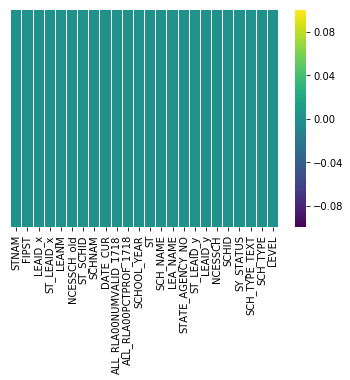

In [57]:
sns.heatmap(edfacts_eng_merged_ccd.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [58]:
edfacts_eng_merged_ccd.columns

Index(['STNAM', 'FIPST', 'LEAID_x', 'ST_LEAID_x', 'LEANM', 'NCESSCH_old',
       'ST_SCHID', 'SCHNAM', 'DATE_CUR', 'ALL_RLA00NUMVALID_1718',
       'ALL_RLA00PCTPROF_1718', 'SCHOOL_YEAR', 'ST', 'SCH_NAME', 'LEA_NAME',
       'STATE_AGENCY_NO', 'ST_LEAID_y', 'LEAID_y', 'NCESSCH', 'SCHID',
       'SY_STATUS', 'SCH_TYPE_TEXT', 'SCH_TYPE', 'LEVEL'],
      dtype='object')

#### Let's take a look at the percent proficiency scores to make sure they look okay

In [59]:
edfacts_eng_merged_ccd.tail(20).T

,88155,88156,88157,88158,88159,88160,88161,88162,88163,88164,88165,88166,88167,88168,88169,88170,88171,88172,88173,88174
STNAM,WYOMING,WYOMING,WYOMING,WYOMING,WYOMING,WYOMING,WYOMING,WYOMING,WYOMING,WYOMING,WYOMING,WYOMING,WYOMING,WYOMING,WYOMING,WYOMING,WYOMING,WYOMING,WYOMING,WYOMING
FIPST,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56
LEAID_x,5605762,5605762,5605762,5605820,5605830,5605830,5605830,5605830,5605830,5605830,5605830,5605830,5605830,5606090,5606090,5606090,5606240,5606240,5606240,5606240
ST_LEAID_x,WY-1902000,WY-1902000,WY-1902000,WY-2202000,WY-2001000,WY-2001000,WY-2001000,WY-2001000,WY-2001000,WY-2001000,WY-2001000,WY-2001000,WY-2001000,WY-2307000,WY-2307000,WY-2307000,WY-2201000,WY-2201000,WY-2201000,WY-2201000
LEANM,Sweetwater County School District #2,Sweetwater County School District #2,Sweetwater County School District #2,Washakie County School District #2,Teton County School District #1,Teton County School District #1,Teton County School District #1,Teton County School District #1,Teton County School District #1,Teton County School District #1,Teton County School District #1,Teton County School District #1,Teton County School District #1,Weston County School District #7,Weston County School District #7,Weston County School District #7,Washakie County School District #1,Washakie County School District #1,Washakie County School District #1,Washakie County School District #1
NCESSCH_old,5.60576e+11,5.60576e+11,5.60576e+11,5.60582e+11,5.60583e+11,5.60583e+11,5.60583e+11,5.60583e+11,5.60583e+11,5.60583e+11,5.60583e+11,5.60583e+11,5.60583e+11,5.60609e+11,5.60609e+11,5.60609e+11,5.60624e+11,5.60624e+11,5.60624e+11,5.60624e+11
ST_SCHID,WY-1902000-1902011,WY-1902000-1902002,WY-1902000-1902006,WY-2202000-2202049,WY-2001000-2001009,WY-2001000-2001010,WY-2001000-2001055,WY-2001000-2001050,WY-2001000-2001001,WY-2001000-2001003,WY-2001000-2001004,WY-2001000-2001005,WY-2001000-2001056,WY-2307000-2307050,WY-2307000-2307001,WY-2307000-2307055,WY-2201000-2201055,WY-2201000-2201050,WY-2201000-2201006,WY-2201000-2201005
SCHNAM,Truman Elementary,Harrison Elementary,Thoman Ranch Elementary,Ten Sleep K-12,Colter Elementary,Jackson Elementary,Jackson Hole High School,Jackson Hole Middle School,Alta Elementary,Kelly Elementary,Moran Elementary,Wilson Elementary,Summit High School,Upton Middle School,Upton Elementary,Upton High School,Worland High School,Worland Middle School,West Side Elementary,South Side Elementary
DATE_CUR,27-Mar-19,27-Mar-19,27-Mar-19,27-Mar-19,27-Mar-19,27-Mar-19,27-Mar-19,27-Mar-19,27-Mar-19,27-Mar-19,27-Mar-19,27-Mar-19,27-Mar-19,27-Mar-19,27-Mar-19,27-Mar-19,27-Mar-19,27-Mar-19,27-Mar-19,27-Mar-19
ALL_RLA00NUMVALID_1718,127,115,2,58,352,209,346,659,29,26,10,116,18,50,60,35,208,335,196,79


In [60]:
#edfacts_eng_merged_ccd['ALL_RLA00PCTPROF_1718'].value_counts(ascending=True)

#### The percents don't look right because the feds have applied suppression and converted some percents to ranges for privacy reasons. Refer to the EdFacts documentation folder for more info: /Phase1/Data Documentation/EdFacts/assessments-sy2017-18-public-file-documentation.docx

###### I am going to replace the ranges with the median value for each range, so we have a continuous variable to work with. Also note, some of the ranges are showing up as dates, I was able to identify the ranges by look at the documentation.For any values that is less than or greater than, I replaced the percent with the next highest value(eg. LT50 replaced with 49). And for any value greater/less than or equal to, I replaced it with the equal to values (eg. LE50 replaced with 50).

In [61]:
edfacts_eng_merged_ccd['ALL_RLA00PCTPROF_1718_new'] = edfacts_eng_merged_ccd['ALL_RLA00PCTPROF_1718'].replace(['9-Jun','14-Oct','19-Nov','15-19','20-24','20-29','21-39','24-29','25-29','30-34','30-39','35-39','40-44','40-49','40-59','45-49','50-59','50-54','55-59',
                                                                                                               '60-64','60-69','60-79','65-69','70-74','70-79','75-79','80-84','80-89','85-89','90-94','GE50','GE80','GE90','GE95','GE99','LE1','LE5','LE10','LE20',
                                                                                                              'LT50'],
                                                                                                              ['7.5','13','15','17','22','24.5','30','27','27','32','34.5','37','42','44.5','49.5','47','54.5','52','57','62','64.5','69.5','67','72','74.5','77','82',
                                                                                                               '84.5','87','92','50','80','90','95','99','1','5','10','20','49'])

In [62]:
count_eng = edfacts_eng_merged_ccd['ALL_RLA00PCTPROF_1718_new'].value_counts() 
print(count_eng) 

42      3394
47      3360
37      3071
52      3028
57      2948
32      2760
62      2569
49      2397
27      2282
67      2275
72      1974
22      1714
77      1641
50      1400
PS      1335
20      1325
30      1305
82      1282
17      1210
45       979
40       951
46       943
41       927
55       913
43       903
38       900
51       892
53       879
36       862
39       859
        ... 
83       342
84       342
19       337
90       304
85       294
18       291
86       284
69.5     282
16       245
84.5     229
89       202
88       202
14       192
91       149
11       147
12       145
1        129
99       121
9        113
94       100
93       100
8         94
98        89
97        83
7         77
96        65
6         53
3         39
2         36
4         28
Name: ALL_RLA00PCTPROF_1718_new, Length: 110, dtype: int64


In [63]:
edfacts_eng_merged_ccd.dtypes

STNAM                         object
FIPST                          int64
LEAID_x                        int64
ST_LEAID_x                    object
LEANM                         object
NCESSCH_old                  float64
ST_SCHID                      object
SCHNAM                        object
DATE_CUR                      object
ALL_RLA00NUMVALID_1718         int64
ALL_RLA00PCTPROF_1718         object
SCHOOL_YEAR                   object
ST                            object
SCH_NAME                      object
LEA_NAME                      object
STATE_AGENCY_NO                int64
ST_LEAID_y                    object
LEAID_y                        int64
NCESSCH                        int64
SCHID                          int64
SY_STATUS                      int64
SCH_TYPE_TEXT                 object
SCH_TYPE                       int64
LEVEL                         object
ALL_RLA00PCTPROF_1718_new     object
dtype: object

In [64]:
edfacts_eng_merged_ccd.shape

(88175, 25)

#### Removing any schools were the percents were entirely suppressed.

In [65]:
edfacts_eng_merged_ccd_new=edfacts_eng_merged_ccd[edfacts_eng_merged_ccd['ALL_RLA00PCTPROF_1718_new']!='PS' ]

In [66]:
edfacts_eng_merged_ccd_new.shape

(86840, 25)

#### Converting dtype to float for easier analysis later

In [67]:
edfacts_eng_merged_ccd_new[['ALL_RLA00PCTPROF_1718_new']] = edfacts_eng_merged_ccd_new[['ALL_RLA00PCTPROF_1718_new']].astype(float)

In [68]:
edfacts_eng_merged_ccd_new.dtypes

STNAM                         object
FIPST                          int64
LEAID_x                        int64
ST_LEAID_x                    object
LEANM                         object
NCESSCH_old                  float64
ST_SCHID                      object
SCHNAM                        object
DATE_CUR                      object
ALL_RLA00NUMVALID_1718         int64
ALL_RLA00PCTPROF_1718         object
SCHOOL_YEAR                   object
ST                            object
SCH_NAME                      object
LEA_NAME                      object
STATE_AGENCY_NO                int64
ST_LEAID_y                    object
LEAID_y                        int64
NCESSCH                        int64
SCHID                          int64
SY_STATUS                      int64
SCH_TYPE_TEXT                 object
SCH_TYPE                       int64
LEVEL                         object
ALL_RLA00PCTPROF_1718_new    float64
dtype: object

In [69]:
#edfacts_eng_merged_ccd.tail(20).T

In [70]:
#edfacts_eng_merged_ccd['comparison_column'] = np.where(edfacts_eng_merged_ccd["SCHNAM"] == edfacts_eng_merged_ccd["SCH_NAME"], True, False)

In [71]:
#edfacts_eng_merged_ccd['comparison_column'].describe()

In [72]:
edfacts_eng_merged_ccd_new.to_csv (r'/Users/dansa/Documents/GitHub/Phase1/Data/EDFacts/edfacts_eng_merged_ccd.csv', index = False, header=True)

### Clean up the Edfacts file for math

In [75]:
cd /Users/dansa/Documents/GitHub/Phase1/Data/EDFacts

C:\Users\dansa\Documents\GitHub\Phase1\Data\EDFacts


In [76]:
edfacts_math = pandas.read_csv("math-achievement-sch-sy2017-18.csv")
edfacts_math.head()

C:\Users\dansa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (11,13,15,17,19,21,23,25,27,29,31,32,33,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109,111,113,115,117,119,121,123,125,127,129,131,133,135,137,139,141,143,145,147,149,151,153,155,157,159,161,163,165,167,169,171,173,175,177,179,181,183,185,187,189,191,193,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,211,213,215,217,219,221,223,225,227,229,231,233,235,236,237,239,241,243,245,247,249,251,253,254,255,256,257,258,259,260,261,262,263) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STNAM,FIPST,LEAID,ST_LEAID,LEANM,NCESSCH,ST_SCHID,SCHNAM,DATE_CUR,ALL_MTH00NUMVALID_1718,...,MIL_MTH05NUMVALID_1718,MIL_MTH05PCTPROF_1718,MIL_MTH06NUMVALID_1718,MIL_MTH06PCTPROF_1718,MIL_MTH07NUMVALID_1718,MIL_MTH07PCTPROF_1718,MIL_MTH08NUMVALID_1718,MIL_MTH08PCTPROF_1718,MIL_MTHHSNUMVALID_1718,MIL_MTHHSPCTPROF_1718
0,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0010,Albertville Middle School,27-Mar-19,802,...,NaN,NaN,NaN,NaN,11,GE50,14,GE50,NaN,NaN
1,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0020,Albertville High School,27-Mar-19,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,GE50
2,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0110,Evans Elementary School,27-Mar-19,851,...,14,LT50,5,PS,NaN,NaN,NaN,NaN,NaN,NaN
3,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0200,Albertville Elementary School,27-Mar-19,902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALABAMA,1,100006,AL-048,Marshall County,1.000060e+10,AL-048-0143,Kate Duncan Smith DAR Middle,27-Mar-19,434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
edfacts_math= edfacts_math[['STNAM','FIPST','LEAID','ST_LEAID','LEANM','NCESSCH','ST_SCHID','SCHNAM','DATE_CUR','ALL_MTH00NUMVALID_1718',
                                 'ALL_MTH00PCTPROF_1718']]
edfacts_math.head()

,STNAM,FIPST,LEAID,ST_LEAID,LEANM,NCESSCH,ST_SCHID,SCHNAM,DATE_CUR,ALL_MTH00NUMVALID_1718,ALL_MTH00PCTPROF_1718
0,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0010,Albertville Middle School,27-Mar-19,802,47
1,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0020,Albertville High School,27-Mar-19,337,37
2,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0110,Evans Elementary School,27-Mar-19,851,37
3,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0200,Albertville Elementary School,27-Mar-19,902,53
4,ALABAMA,1,100006,AL-048,Marshall County,1.000060e+10,AL-048-0143,Kate Duncan Smith DAR Middle,27-Mar-19,434,56


In [78]:
edfacts_math.shape

(87102, 11)

In [79]:
edfacts_math.rename(columns={'NCESSCH':'NCESSCH_old'}, inplace=True)

In [80]:
edfacts_math.dtypes

STNAM                      object
FIPST                       int64
LEAID                       int64
ST_LEAID                   object
LEANM                      object
NCESSCH_old               float64
ST_SCHID                   object
SCHNAM                     object
DATE_CUR                   object
ALL_MTH00NUMVALID_1718      int64
ALL_MTH00PCTPROF_1718      object
dtype: object

In [81]:
edfacts_math.describe()

,FIPST,LEAID,NCESSCH_old,ALL_MTH00NUMVALID_1718
count,87102.000000,8.710200e+04,8.710200e+04,87102.000000
mean,28.258846,2.837704e+06,2.837704e+11,288.412849
std,16.661729,1.665909e+06,1.665909e+11,252.355975
min,1.000000,1.000050e+05,1.000050e+10,1.000000
25%,13.000000,1.300210e+06,1.300210e+11,123.000000
50%,28.000000,2.804320e+06,2.804320e+11,228.000000
75%,42.000000,4.202590e+06,4.202590e+11,370.000000
max,72.000000,7.200030e+06,7.200030e+11,7910.000000


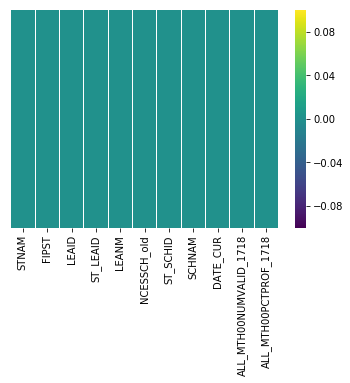

In [82]:
sns.heatmap(edfacts_math.isnull(),yticklabels=False,cbar=True,cmap='viridis')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028982834B70>,
      dtype=object)

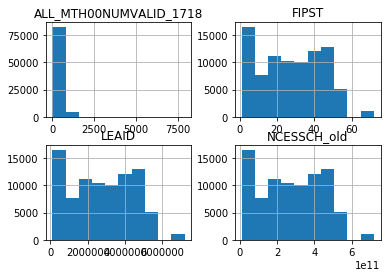

In [83]:
edfacts_math.hist()

In [84]:
cd /Users/dansa/Documents/GitHub/Phase1/Data/CCD

C:\Users\dansa\Documents\GitHub\Phase1\Data\CCD


In [85]:
ccd_directory= pandas.read_csv("Clean_ccd_directory.csv")
ccd_directory.head()

,SCHOOL_YEAR,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,ST_LEAID,LEAID,ST_SCHID,NCESSCH,SCHID,SY_STATUS,SCH_TYPE_TEXT,SCH_TYPE,LEVEL
0,2017-2018,AL,Albertville Middle School,Albertville City,1,AL-101,100005,AL-101-0010,10000500870,100870,1,Regular School,1,Middle
1,2017-2018,AL,Albertville High School,Albertville City,1,AL-101,100005,AL-101-0020,10000500871,100871,1,Regular School,1,High
2,2017-2018,AL,Evans Elementary School,Albertville City,1,AL-101,100005,AL-101-0110,10000500879,100879,1,Regular School,1,Middle
3,2017-2018,AL,Albertville Elementary School,Albertville City,1,AL-101,100005,AL-101-0200,10000500889,100889,1,Regular School,1,Elementary
4,2017-2018,AL,Big Spring Lake Kindergarten School,Albertville City,1,AL-101,100005,AL-101-0035,10000501616,101616,1,Regular School,1,Elementary


#### Joining ccd_directory and edfacts datasets.

In [86]:
edfacts_math_merged_ccd = edfacts_math.merge(ccd_directory, on='ST_SCHID')

In [87]:
edfacts_math_merged_ccd.head()

,STNAM,FIPST,LEAID_x,ST_LEAID_x,LEANM,NCESSCH_old,ST_SCHID,SCHNAM,DATE_CUR,ALL_MTH00NUMVALID_1718,...,LEA_NAME,STATE_AGENCY_NO,ST_LEAID_y,LEAID_y,NCESSCH,SCHID,SY_STATUS,SCH_TYPE_TEXT,SCH_TYPE,LEVEL
0,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0010,Albertville Middle School,27-Mar-19,802,...,Albertville City,1,AL-101,100005,10000500870,100870,1,Regular School,1,Middle
1,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0020,Albertville High School,27-Mar-19,337,...,Albertville City,1,AL-101,100005,10000500871,100871,1,Regular School,1,High
2,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0110,Evans Elementary School,27-Mar-19,851,...,Albertville City,1,AL-101,100005,10000500879,100879,1,Regular School,1,Middle
3,ALABAMA,1,100005,AL-101,Albertville City,1.000050e+10,AL-101-0200,Albertville Elementary School,27-Mar-19,902,...,Albertville City,1,AL-101,100005,10000500889,100889,1,Regular School,1,Elementary
4,ALABAMA,1,100006,AL-048,Marshall County,1.000060e+10,AL-048-0143,Kate Duncan Smith DAR Middle,27-Mar-19,434,...,Marshall County,1,AL-048,100006,10000600193,100193,1,Regular School,1,Middle


In [88]:
edfacts_math_merged_ccd.shape  #one middle school and 3 DC youth programs did not find a match in the CCD file

(87098, 24)

In [89]:
edfacts_math_merged_ccd.describe()

,FIPST,LEAID_x,NCESSCH_old,ALL_MTH00NUMVALID_1718,STATE_AGENCY_NO,LEAID_y,NCESSCH,SCHID,SY_STATUS,SCH_TYPE
count,87098.000000,8.709800e+04,8.709800e+04,87098.000000,87098.0,8.709800e+04,8.709800e+04,8.709800e+04,87098.000000,87098.000000
mean,28.259443,2.837765e+06,2.837765e+11,288.424430,1.0,2.837765e+06,2.837765e+11,2.828894e+06,1.023135,1.133746
std,16.661804,1.665916e+06,1.665916e+11,252.355705,0.0,1.665916e+06,1.665916e+11,1.666006e+06,0.256233,0.594754
min,1.000000,1.000050e+05,1.000050e+10,1.000000,1.0,1.000050e+05,1.000050e+10,1.000010e+05,1.000000,1.000000
25%,13.000000,1.300211e+06,1.300210e+11,123.000000,1.0,1.300211e+06,1.300211e+11,1.300276e+06,1.000000,1.000000
50%,28.000000,2.804320e+06,2.804320e+11,228.000000,1.0,2.804320e+06,2.804320e+11,2.801397e+06,1.000000,1.000000
75%,42.000000,4.202590e+06,4.202590e+11,370.000000,1.0,4.202590e+06,4.202590e+11,4.200461e+06,1.000000,1.000000
max,72.000000,7.200030e+06,7.200030e+11,7910.000000,1.0,7.200030e+06,7.200030e+11,7.202085e+06,8.000000,4.000000


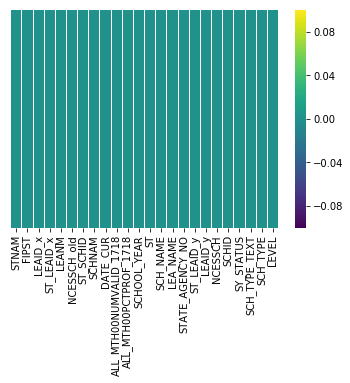

In [90]:
sns.heatmap(edfacts_math_merged_ccd.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [91]:
edfacts_math_merged_ccd.columns

Index(['STNAM', 'FIPST', 'LEAID_x', 'ST_LEAID_x', 'LEANM', 'NCESSCH_old',
       'ST_SCHID', 'SCHNAM', 'DATE_CUR', 'ALL_MTH00NUMVALID_1718',
       'ALL_MTH00PCTPROF_1718', 'SCHOOL_YEAR', 'ST', 'SCH_NAME', 'LEA_NAME',
       'STATE_AGENCY_NO', 'ST_LEAID_y', 'LEAID_y', 'NCESSCH', 'SCHID',
       'SY_STATUS', 'SCH_TYPE_TEXT', 'SCH_TYPE', 'LEVEL'],
      dtype='object')

#### The percents don't look right because the feds have applied suppression and converted some percents to ranges for privacy reasons. Refer to the EdFacts documentation folder for more info: /Phase1/Data Documentation/EdFacts/assessments-sy2017-18-public-file-documentation.docx. Applied same transformations as those applied to the reading file.

In [92]:
edfacts_math_merged_ccd['ALL_MTH00PCTPROF_1718_new'] = edfacts_math_merged_ccd['ALL_MTH00PCTPROF_1718'].replace(['9-Jun','14-Oct','19-Nov','15-19','20-24','20-29','21-39','24-29','25-29','30-34','30-39','35-39','40-44','40-49','40-59','45-49','50-59','50-54','55-59',
                                                                                                               '60-64','60-69','60-79','65-69','70-74','70-79','75-79','80-84','80-89','85-89','90-94','GE50','GE80','GE90','GE95','GE99','LE1','LE5','LE10','LE20',
                                                                                                              'LT50'],
                                                                                                              ['7.5','13','15','17','22','24.5','30','27','27','32','34.5','37','42','44.5','49.5','47','54.5','52','57','62','64.5','69.5','67','72','74.5','77','82',
                                                                                                               '84.5','87','92','50','80','90','95','99','1','5','10','20','49'])

In [93]:
count_math = edfacts_math_merged_ccd['ALL_MTH00PCTPROF_1718_new'].value_counts() 
print(count_math)

42      3103
37      3034
47      3028
32      2931
52      2800
49      2549
27      2491
57      2414
22      2234
62      2139
20      1965
17      1832
67      1825
5       1529
72      1527
13      1434
10      1433
PS      1350
30      1252
77      1224
50      1142
82       983
15       927
40       896
44       877
38       867
43       865
41       854
39       839
45       832
        ... 
95       354
49.5     343
79       320
11       316
12       314
81       287
83       282
90       257
9        252
84       245
8        230
6        228
74.5     215
7        209
86       197
85       190
69.5     188
84.5     184
88       135
89       130
4        128
3        121
2        117
91       106
93        80
99        74
94        56
97        55
96        53
98        46
Name: ALL_MTH00PCTPROF_1718_new, Length: 110, dtype: int64


In [94]:
edfacts_math_merged_ccd.dtypes

STNAM                         object
FIPST                          int64
LEAID_x                        int64
ST_LEAID_x                    object
LEANM                         object
NCESSCH_old                  float64
ST_SCHID                      object
SCHNAM                        object
DATE_CUR                      object
ALL_MTH00NUMVALID_1718         int64
ALL_MTH00PCTPROF_1718         object
SCHOOL_YEAR                   object
ST                            object
SCH_NAME                      object
LEA_NAME                      object
STATE_AGENCY_NO                int64
ST_LEAID_y                    object
LEAID_y                        int64
NCESSCH                        int64
SCHID                          int64
SY_STATUS                      int64
SCH_TYPE_TEXT                 object
SCH_TYPE                       int64
LEVEL                         object
ALL_MTH00PCTPROF_1718_new     object
dtype: object

In [95]:
edfacts_math_merged_ccd.shape

(87098, 25)

In [96]:
edfacts_math_merged_ccd_new=edfacts_math_merged_ccd[edfacts_math_merged_ccd['ALL_MTH00PCTPROF_1718_new']!='PS' ]

In [97]:
edfacts_math_merged_ccd_new.shape

(85748, 25)

In [98]:
edfacts_math_merged_ccd_new[['ALL_MTH00PCTPROF_1718_new']] = edfacts_math_merged_ccd_new[['ALL_MTH00PCTPROF_1718_new']].astype(float)

In [99]:
edfacts_math_merged_ccd_new.dtypes

STNAM                         object
FIPST                          int64
LEAID_x                        int64
ST_LEAID_x                    object
LEANM                         object
NCESSCH_old                  float64
ST_SCHID                      object
SCHNAM                        object
DATE_CUR                      object
ALL_MTH00NUMVALID_1718         int64
ALL_MTH00PCTPROF_1718         object
SCHOOL_YEAR                   object
ST                            object
SCH_NAME                      object
LEA_NAME                      object
STATE_AGENCY_NO                int64
ST_LEAID_y                    object
LEAID_y                        int64
NCESSCH                        int64
SCHID                          int64
SY_STATUS                      int64
SCH_TYPE_TEXT                 object
SCH_TYPE                       int64
LEVEL                         object
ALL_MTH00PCTPROF_1718_new    float64
dtype: object

In [100]:
#edfacts_math_merged_ccd['comparison_column'] = np.where(edfacts_math_merged_ccd["SCHNAM"] == edfacts_math_merged_ccd["SCH_NAME"], True, False)

In [101]:
#edfacts_math_merged_ccd['comparison_column'].describe()

#### Saving file for later use

In [102]:
edfacts_math_merged_ccd_new.to_csv (r'/Users/dansa/Documents/GitHub/Phase1/Data/EDFacts/edfacts_math_merged_ccd.csv', index = False, header=True)